In [1]:
import os

import numpy as np
import pandas as pd
from pandas.tseries.offsets import Day
import statsmodels.api as sm
import matplotlib.pyplot as plt
import types

In [2]:
DIR = os.path.dirname('/home/xurenchao/work/rnn/Time-Series-Decomposition/dataset/')

In [3]:
from spot import DailyDataset, get_loader, TOTAL_STD, TOTAL_MEAN, hour_mean, SPOT

In [4]:
# plot hour_mean

In [5]:
# cared_2012 = SPOT['2012-07-01':'2012-07-31']
# cared_2013 = SPOT['2013-07-01':'2013-07-31']
# cared_2014 = SPOT['2014-07-01':'2014-07-31']
# cared_2015 = SPOT['2015-07-01':'2015-07-31']
cared_2012 = SPOT['2012':'2012']
cared_2013 = SPOT['2013':'2013']
cared_2014 = SPOT['2014':'2014']
cared_2015 = SPOT['2015':'2015']
hour_mean_2012 = cared_2012.groupby(cared_2012.index.hour).mean()
hour_mean_2013 = cared_2013.groupby(cared_2013.index.hour).mean()
hour_mean_2014 = cared_2014.groupby(cared_2014.index.hour).mean()
hour_mean_2015 = cared_2015.groupby(cared_2015.index.hour).mean()
weekday_mean_2012 = cared_2012.groupby(cared_2012.index.weekday).mean()
weekday_mean_2013 = cared_2013.groupby(cared_2013.index.weekday).mean()
weekday_mean_2014 = cared_2014.groupby(cared_2014.index.weekday).mean()
weekday_mean_2015 = cared_2015.groupby(cared_2015.index.weekday).mean()

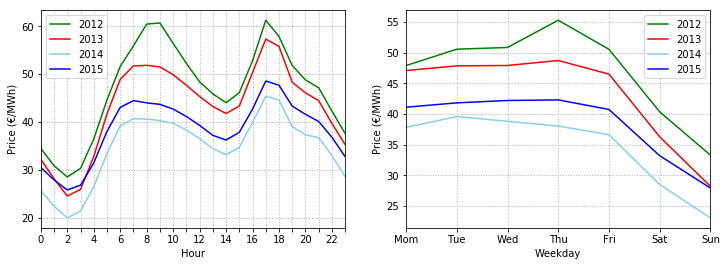

In [6]:
#开始画图
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
x=np.linspace(0, 23, 24)
plt.plot(x, hour_mean_2012.values.tolist(), color='green', label='2012')
plt.plot(x, hour_mean_2013.values.tolist(), color='red', label='2013')
plt.plot(x, hour_mean_2014.values.tolist(),  color='skyblue', label='2014')
plt.plot(x, hour_mean_2015.values.tolist(), color='blue', label='2015')
plt.xticks(x, (0,'',2,'',4,'',6,'',8,'',10,'',12,'',14,'',16,'',18,'',20,'',22))
plt.xlim(0,23)
plt.legend()
plt.xlabel('Hour',fontsize=10)
plt.ylabel('Price (€/MWh)',fontsize=10)
plt.grid(linestyle=':', linewidth=1)

plt.subplot(1,2,2)
x=np.linspace(0, 6, 7)
plt.plot(x, weekday_mean_2012.values.tolist(), color='green', label='2012')
plt.plot(x, weekday_mean_2013.values.tolist(), color='red', label='2013')
plt.plot(x, weekday_mean_2014.values.tolist(),  color='skyblue', label='2014')
plt.plot(x, weekday_mean_2015.values.tolist(), color='blue', label='2015')
plt.xticks(x, ('Mom', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.xlim(0,6)
plt.legend()
plt.xlabel('Weekday',fontsize=10)
plt.ylabel('Price (€/MWh)',fontsize=10)
plt.grid(linestyle=':', linewidth=1)

plt.savefig('./Hour.jpg',bbox_inches='tight')

plt.show()

In [7]:
# var

In [8]:
cared = SPOT['2012':'2012']
hour_mean = cared.groupby(cared.index.hour).mean()
hour_std = cared.groupby(cared.index.hour).std()

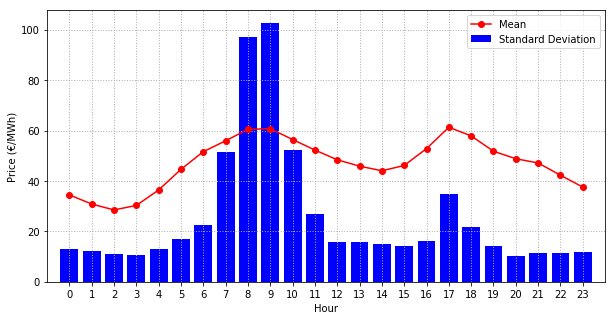

In [9]:
#开始画图
x=np.linspace(0, 23, 24)
plt.figure(figsize=(10,5))
plt.bar(x, hour_std.values.tolist(), color='blue', label='Standard Deviation')
plt.plot(x, hour_mean.values.tolist(), color='red', marker='o', label='Mean')

plt.xticks(x)
plt.xlim(-1,24)

plt.legend() # 显示图例

plt.xlabel('Hour',fontsize=10)
plt.ylabel('Price (€/MWh)',fontsize=10)

plt.grid(linestyle=':', linewidth=1)
plt.savefig('./Hour_std.jpg',bbox_inches='tight')

plt.show()

In [10]:
# spike

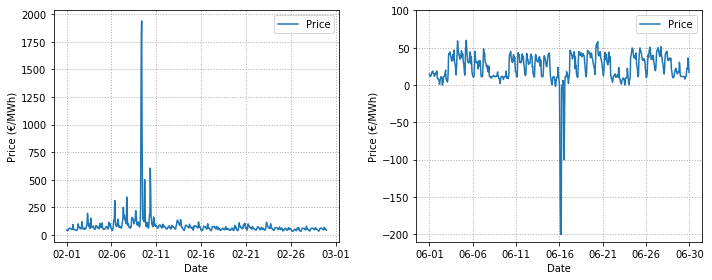

In [11]:
x=np.linspace(0, 720, 7)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(SPOT['2012-02':'2012-02'].values.tolist(), label='Price')
plt.xticks(x, ('02-01', '02-06', '02-11', '02-16', '02-21', '02-26', '03-01'))
plt.xlabel('Date',fontsize=10)
plt.ylabel('Price (€/MWh)',fontsize=10)
plt.legend() # 显示图例
plt.grid(linestyle=':', linewidth=1)


plt.subplot(1,2,2)
plt.plot(SPOT['2013-06':'2013-06'].values.tolist(), label='Price')
plt.xticks(x, ('06-01', '06-06', '06-11', '06-16', '06-21', '06-26', '06-30'))
plt.ylim(-210, 100)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Price (€/MWh)',fontsize=10)
plt.legend() # 显示图例
plt.grid(linestyle=':', linewidth=1)
plt.tight_layout()
plt.subplots_adjust(bottom=None,left=None,right=None,top=None, hspace=None, wspace=0.27)

plt.savefig('./Spike.jpg',bbox_inches='tight')

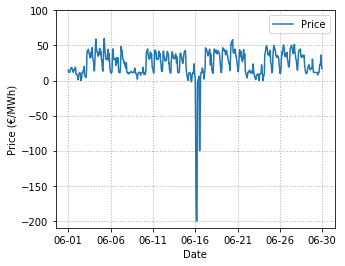

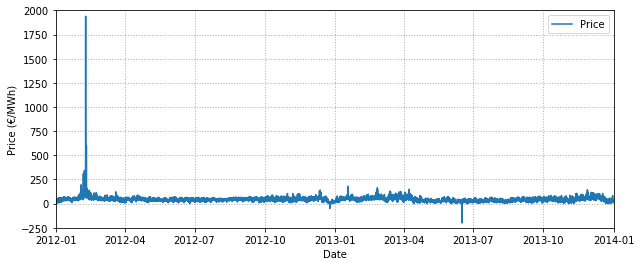

In [324]:
plt.figure(figsize=(10,4))
plt.plot(SPOT['2012':'2014'], label='Price')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Price (€/MWh)',fontsize=10)
plt.xlim('2012', '2014')
plt.ylim(-250, 2000)
plt.legend() # 显示图例
plt.grid(linestyle=':', linewidth=1)
plt.savefig('./Spike.jpg',bbox_inches='tight', dpi=400)

In [326]:
SPOT['2012':'2014'].mean()

41.607050904804964